# <!-- TITLE --> NOTEBOOK 3 - Physics Informed Neural Networks : architecture du réseau de neurones

#### Les étapes principales de ce Notebook :
 - Etape 1 - Lancement des **piles logiciels** ;
 - Etape 2 - Architecture **linéaire** :
     - Influence du nombre de **couches cachées** ;
     - Influence du nombre de **neurones** par couches cachées.
 - Etape 3 - Architecture en **escalier** ;
     - Architecture **montante** ;
     - Architecture **descendante** ;
     - Comparaison architecture **montante VS descendante**.
 - Etape 4 - Architecture **pyramidale** ;
 - Etape 5 - Comparaison des **meilleures architectures**.

## Etape 1 -  Piles logicielles
Dans un premier temps, nous allons lancer toutes les piles logicielles nécessaires au bon fonctionnement de ce notebook et des commandes utilisées.

In [1]:
######################################
# Pour le fonctionnement du notebook #
######################################
import pandas as pd

####################
# Pour l'affichage #
####################
%matplotlib widget
import matplotlib.pyplot as plt

## Etape 2 - Architecture linéaire
### Etape 2.1 Influence du nombre de couches cachées

In [2]:
##########################################################
# Lecture des fichiers contenant les données des courbes #
##########################################################
Courbe_1 = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Couches_Cachees\ca_n1.csv')
Courbe_1.columns = ['Epoques','Perte']
Courbe_2 = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Couches_Cachees\ca_n2.csv')
Courbe_2.columns = ['Epoques','Perte']
Courbe_3 = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Couches_Cachees\ca_n3.csv')
Courbe_3.columns = ['Epoques','Perte']
Courbe_4 = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Couches_Cachees\ca_n4.csv')
Courbe_4.columns = ['Epoques','Perte']
Courbe_5 = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Couches_Cachees\ca_n5.csv')
Courbe_5.columns = ['Epoques','Perte']
Courbe_6 = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Couches_Cachees\ca_n6.csv')
Courbe_6.columns = ['Epoques','Perte']

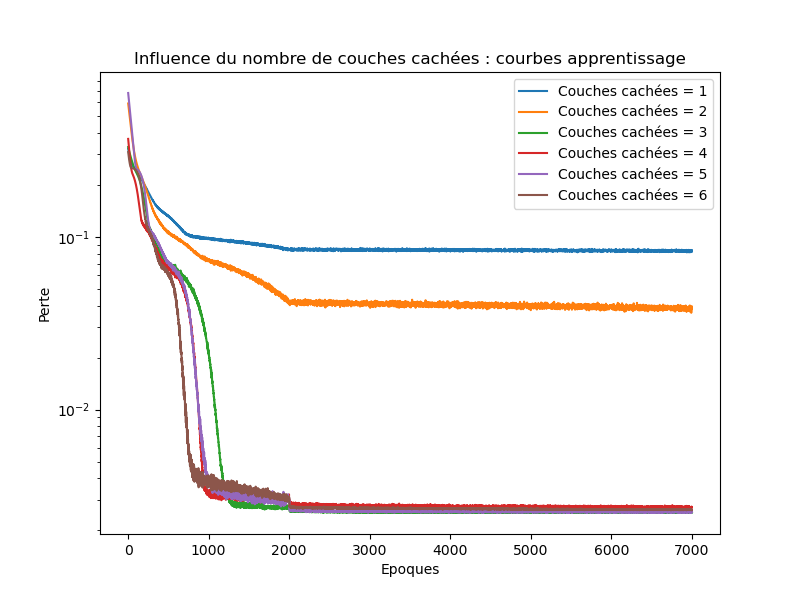

In [3]:
#############################################
# Nombre de couches cachées = [1,2,3,4,5,6] #
#############################################
fig1 = plt.figure(figsize=(8,6))
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.title("Influence du nombre de couches cachées : courbes apprentissage")
line1, = plt.plot(Courbe_1.iloc[:,0],Courbe_1.iloc[:,1:2].values)
line2, = plt.plot(Courbe_1.iloc[:,0],Courbe_2.iloc[:,1:2].values)
line3, = plt.plot(Courbe_1.iloc[:,0],Courbe_3.iloc[:,1:2].values)
line4, = plt.plot(Courbe_1.iloc[:,0],Courbe_4.iloc[:,1:2].values)
line5, = plt.plot(Courbe_1.iloc[:,0],Courbe_5.iloc[:,1:2].values)
line6, = plt.plot(Courbe_1.iloc[:,0],Courbe_6.iloc[:,1:2].values)
plt.legend([line1, line2, line3, line4, line5, line6],['Couches cachées = 1','Couches cachées = 2','Couches cachées = 3','Couches cachées = 4','Couches cachées = 5','Couches cachées = 6'])
plt.yscale('log')
plt.show()

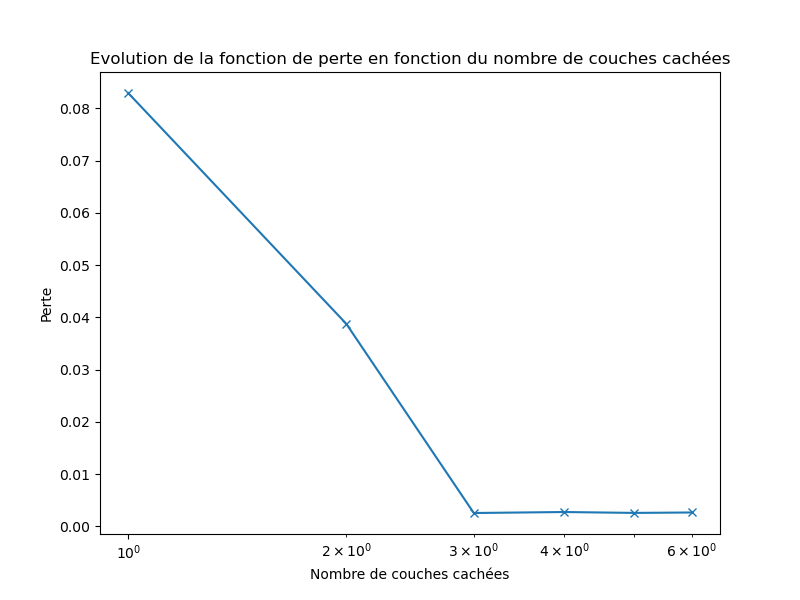

In [4]:
##############################################################
# Fonction de perte en fonction du nombre de couches cachées #
##############################################################
# Liste des learning rate
Couches_cc=[1,2,3,4,5,6]
# On fait une moyenne de la fonction de perte sur les 1000 dernières itérations
Perte_1 = sum(Courbe_1.iloc[6000:7000,1:2].values)/1000
Perte_2 = sum(Courbe_2.iloc[6000:7000,1:2].values)/1000
Perte_3 = sum(Courbe_3.iloc[6000:7000,1:2].values)/1000
Perte_4 = sum(Courbe_4.iloc[6000:7000,1:2].values)/1000
Perte_5 = sum(Courbe_5.iloc[6000:7000,1:2].values)/1000
Perte_6 = sum(Courbe_6.iloc[6000:7000,1:2].values)/1000
# Liste des valeurs de la fonction de perte
Perte = [Perte_1,Perte_2,Perte_3,Perte_4,Perte_5,Perte_6]
# On trace la figure
fig2 = plt.figure(figsize=(8,6))
plt.xlabel("Nombre de couches cachées")
plt.ylabel("Perte")
plt.title("Evolution de la fonction de perte en fonction du nombre de couches cachées")
line1, = plt.plot(Couches_cc,Perte,'-x')
plt.xscale('log')
plt.show()

### Etape 2.2 Influence du nombre de neurones par couches cachées

In [5]:
##########################################################
# Lecture des fichiers contenant les données des courbes #
##########################################################
Courbe_1 = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Neurones\ca_n1.csv')
Courbe_1.columns = ['Epoques','Perte']
Courbe_2 = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Neurones\ca_n2.csv')
Courbe_2.columns = ['Epoques','Perte']
Courbe_3 = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Neurones\ca_n3.csv')
Courbe_3.columns = ['Epoques','Perte']
Courbe_4 = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Neurones\ca_n4.csv')
Courbe_4.columns = ['Epoques','Perte']
Courbe_5 = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Neurones\ca_n5.csv')
Courbe_5.columns = ['Epoques','Perte']
Courbe_6 = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Neurones\ca_n6.csv')
Courbe_6.columns = ['Epoques','Perte']
Courbe_7 = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Neurones\ca_n7.csv')
Courbe_7.columns = ['Epoques','Perte']

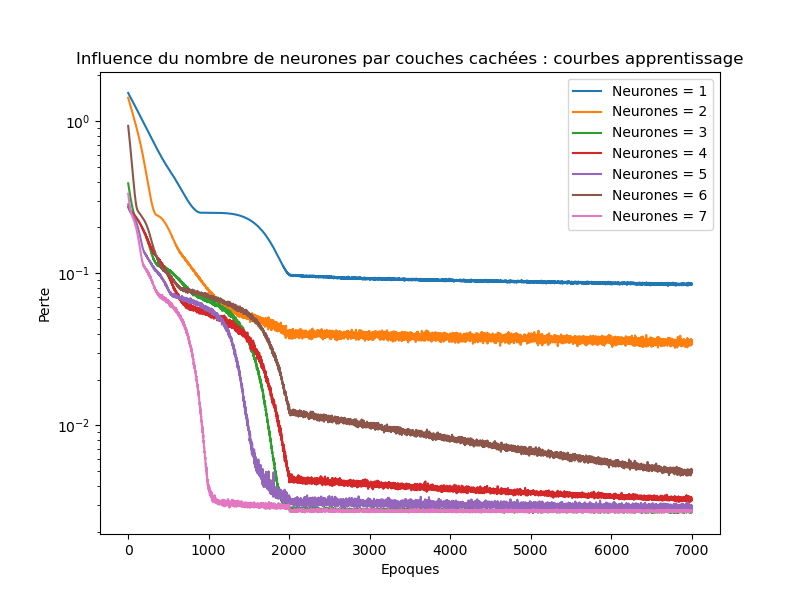

In [6]:
#######################################
# Neurones par couche cachée de 1 à 7 #
#######################################
fig3 = plt.figure(figsize=(8,6))
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.title("Influence du nombre de neurones par couches cachées : courbes apprentissage")
line1, = plt.plot(Courbe_1.iloc[:,0],Courbe_1.iloc[:,1:2].values)
line2, = plt.plot(Courbe_1.iloc[:,0],Courbe_2.iloc[:,1:2].values)
line3, = plt.plot(Courbe_1.iloc[:,0],Courbe_3.iloc[:,1:2].values)
line4, = plt.plot(Courbe_1.iloc[:,0],Courbe_4.iloc[:,1:2].values)
line5, = plt.plot(Courbe_1.iloc[:,0],Courbe_5.iloc[:,1:2].values)
line6, = plt.plot(Courbe_1.iloc[:,0],Courbe_6.iloc[:,1:2].values)
line7, = plt.plot(Courbe_1.iloc[:,0],Courbe_7.iloc[:,1:2].values)
plt.legend([line1, line2, line3, line4, line5, line6, line7],['Neurones = 1','Neurones = 2','Neurones = 3','Neurones = 4','Neurones = 5','Neurones = 6','Neurones = 7'])
plt.yscale('log')
plt.show()

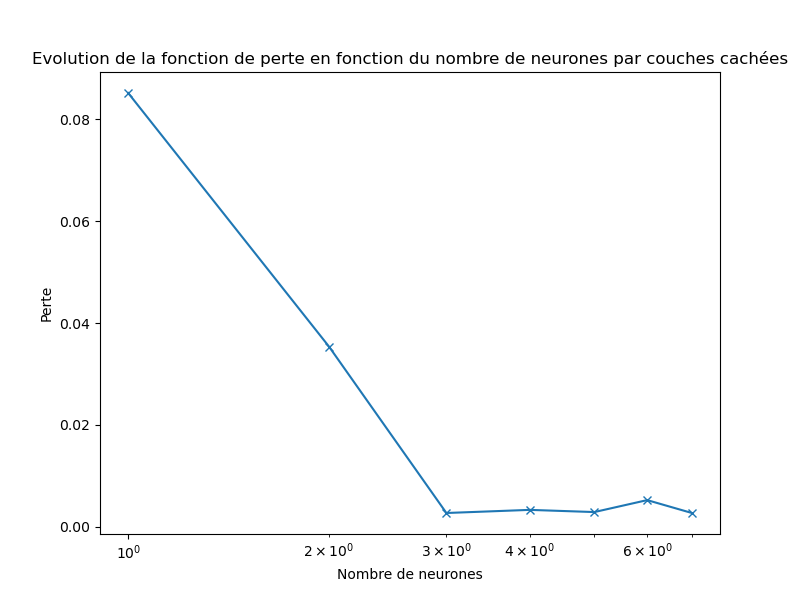

In [7]:
#############################################
# Troisième étape : perte en fonction de lr #
#############################################
# Liste des learning rate
Learning_Rate=[1,2,3,4,5,6,7]
# On fait une moyenne de la fonction de perte sur les 1000 dernières itérations
Perte_1 = sum(Courbe_1.iloc[6000:7000,1:2].values)/1000
Perte_2 = sum(Courbe_2.iloc[6000:7000,1:2].values)/1000
Perte_3 = sum(Courbe_3.iloc[6000:7000,1:2].values)/1000
Perte_4 = sum(Courbe_4.iloc[6000:7000,1:2].values)/1000
Perte_5 = sum(Courbe_5.iloc[6000:7000,1:2].values)/1000
Perte_6 = sum(Courbe_6.iloc[6000:7000,1:2].values)/1000
Perte_7 = sum(Courbe_7.iloc[6000:7000,1:2].values)/1000
# Liste des valeurs de la fonction de perte
Perte = [Perte_1,Perte_2,Perte_3,Perte_4,Perte_5,Perte_6,Perte_7]
# On trace la figure
fig4 = plt.figure(figsize=(8,6))
plt.xlabel("Nombre de neurones")
plt.ylabel("Perte")
plt.title("Evolution de la fonction de perte en fonction du nombre de neurones par couches cachées")
line1, = plt.plot(Learning_Rate,Perte,'-x')
plt.xscale('log')
plt.show()

## Etape 3 - Architecture en escalier
### Etape 3.1 - Architecture montante

In [8]:
##########################################################
# Lecture des fichiers contenant les données des courbes #
##########################################################
Courbe_1G = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Escalier\Grimpe\Escalier_Grimpe_2.csv')
Courbe_1G.columns = ['Epoques','Perte']
Courbe_2G = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Escalier\Grimpe\Escalier_Grimpe_3.csv')
Courbe_2G.columns = ['Epoques','Perte']
Courbe_3G = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Escalier\Grimpe\Escalier_Grimpe_4.csv')
Courbe_3G.columns = ['Epoques','Perte']
Courbe_4G = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Escalier\Grimpe\Escalier_Grimpe_5.csv')
Courbe_4G.columns = ['Epoques','Perte']
Courbe_5G = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Escalier\Grimpe\Escalier_Grimpe_6.csv')
Courbe_5G.columns = ['Epoques','Perte']

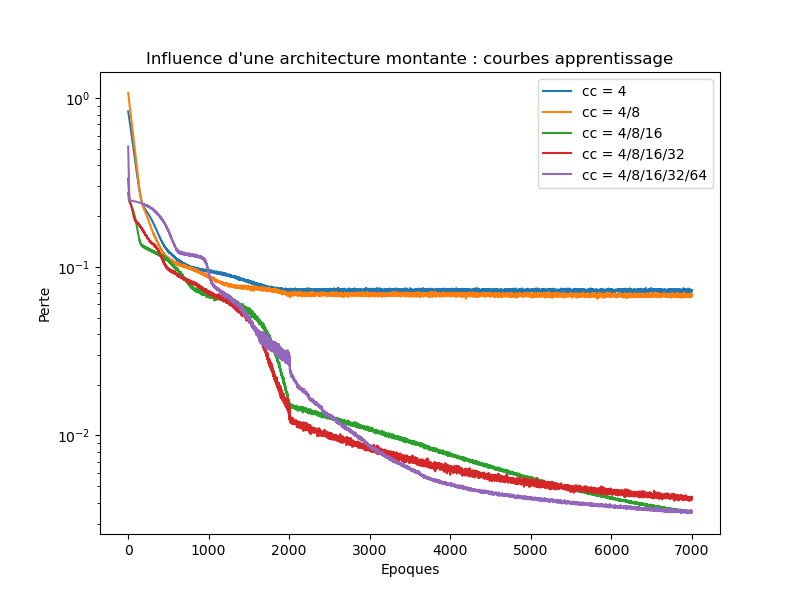

In [9]:
########################################################
# Architecture = [4,4/8,4/8/16,4/8/16/32,4/8/16/32/64] #
########################################################
fig5 = plt.figure(figsize=(8,6))
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.title("Influence d'une architecture montante : courbes apprentissage")
line1, = plt.plot(Courbe_1G.iloc[:,0],Courbe_1G.iloc[:,1:2].values)
line2, = plt.plot(Courbe_1G.iloc[:,0],Courbe_2G.iloc[:,1:2].values)
line3, = plt.plot(Courbe_1G.iloc[:,0],Courbe_3G.iloc[:,1:2].values)
line4, = plt.plot(Courbe_1G.iloc[:,0],Courbe_4G.iloc[:,1:2].values)
line5, = plt.plot(Courbe_1G.iloc[:,0],Courbe_5G.iloc[:,1:2].values)
plt.legend([line1, line2, line3, line4, line5],['cc = 4','cc = 4/8','cc = 4/8/16','cc = 4/8/16/32','cc = 4/8/16/32/64'])
plt.yscale('log')
plt.show()

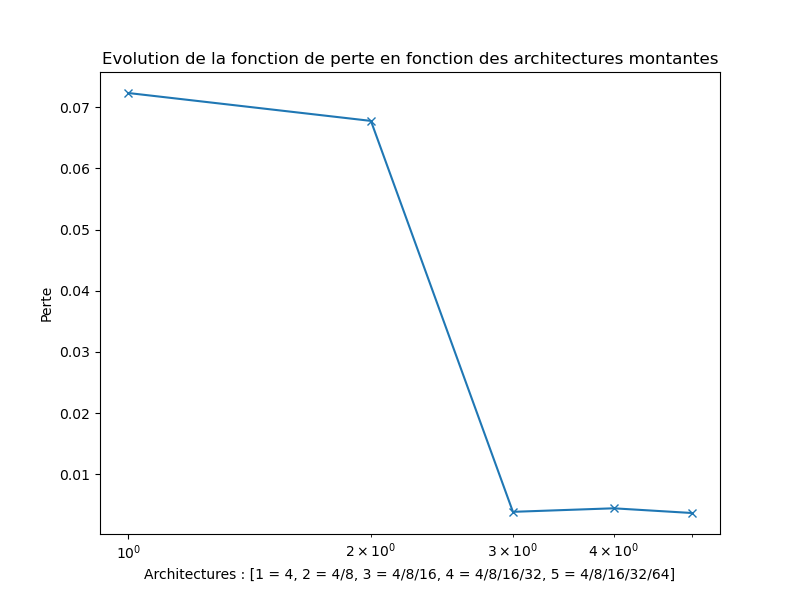

In [10]:
###################################################
# Fonction de perte en fonction de l'architecture #
###################################################
# Liste des architectures [1 = 4, 2 = 4/8, 3 = 4/8/16, 4 = 4/8/16/32, 5 = 4/8/16/32/64]
Architecture=[1,2,3,4,5]
# On fait une moyenne de la fonction de perte sur les 1000 dernières itérations
Perte_1 = sum(Courbe_1G.iloc[6000:7000,1:2].values)/1000
Perte_2 = sum(Courbe_2G.iloc[6000:7000,1:2].values)/1000
Perte_3 = sum(Courbe_3G.iloc[6000:7000,1:2].values)/1000
Perte_4 = sum(Courbe_4G.iloc[6000:7000,1:2].values)/1000
Perte_5 = sum(Courbe_5G.iloc[6000:7000,1:2].values)/1000
# Liste des valeurs de la fonction de perte
Perte = [Perte_1,Perte_2,Perte_3,Perte_4,Perte_5]
# On trace la figure
fig6 = plt.figure(figsize=(8,6))
plt.xlabel("Architectures : [1 = 4, 2 = 4/8, 3 = 4/8/16, 4 = 4/8/16/32, 5 = 4/8/16/32/64]")
plt.ylabel("Perte")
plt.title("Evolution de la fonction de perte en fonction des architectures montantes")
line1, = plt.plot(Architecture,Perte,'-x')
plt.xscale('log')
plt.show()

### Etape 3.2 - Architecture descendante

In [11]:
##########################################################
# Lecture des fichiers contenant les données des courbes #
##########################################################
Courbe_1D = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Escalier\Descente\Escalier_Descente_2.csv')
Courbe_1D.columns = ['Epoques','Perte']
Courbe_2D = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Escalier\Descente\Escalier_Descente_3.csv')
Courbe_2D.columns = ['Epoques','Perte']
Courbe_3D = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Escalier\Descente\Escalier_Descente_4.csv')
Courbe_3D.columns = ['Epoques','Perte']
Courbe_4D = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Escalier\Descente\Escalier_Descente_5.csv')
Courbe_4D.columns = ['Epoques','Perte']
Courbe_5D = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Escalier\Descente\Escalier_Descente_6.csv')
Courbe_5D.columns = ['Epoques','Perte']

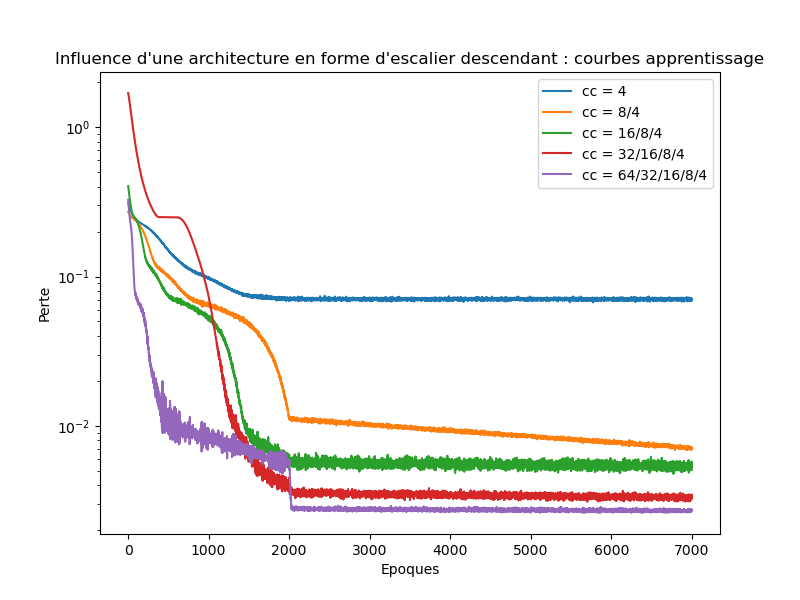

In [12]:
########################################################
# Architecture = [4,8/4,16/8/4,32/16/8/4,64/32/16/8/4] #
########################################################
fig7 = plt.figure(figsize=(8,6))
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.title("Influence d'une architecture en forme d'escalier descendant : courbes apprentissage")
line1, = plt.plot(Courbe_1D.iloc[:,0],Courbe_1D.iloc[:,1:2].values)
line2, = plt.plot(Courbe_1D.iloc[:,0],Courbe_2D.iloc[:,1:2].values)
line3, = plt.plot(Courbe_1D.iloc[:,0],Courbe_3D.iloc[:,1:2].values)
line4, = plt.plot(Courbe_1D.iloc[:,0],Courbe_4D.iloc[:,1:2].values)
line5, = plt.plot(Courbe_1D.iloc[:,0],Courbe_5D.iloc[:,1:2].values)
plt.legend([line1, line2, line3, line4, line5],['cc = 4','cc = 8/4','cc = 16/8/4','cc = 32/16/8/4','cc = 64/32/16/8/4'])
plt.yscale('log')
plt.show()

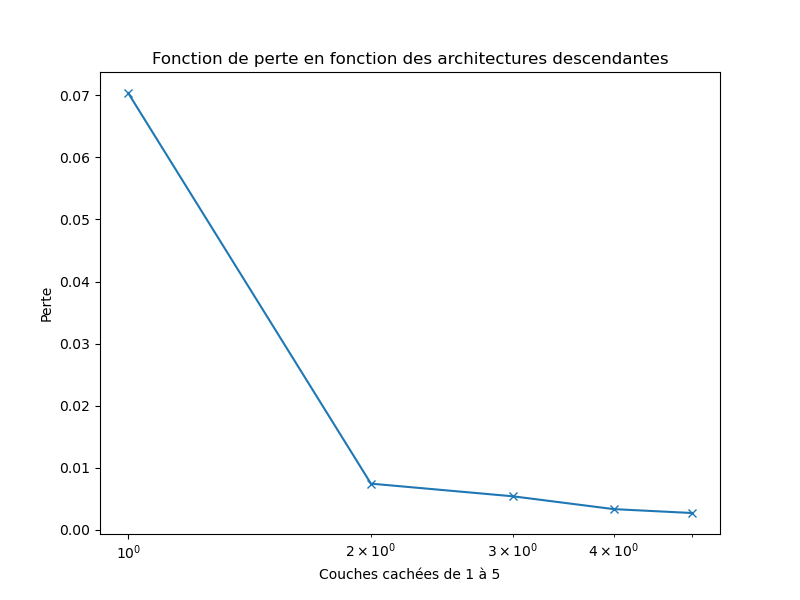

In [13]:
###################################################
# Fonction de perte en fonction de l'architecture #
###################################################
# Liste des learning rate
Architecture=[1,2,3,4,5]
# On fait une moyenne de la fonction de perte sur les 1000 dernières itérations
Perte_1 = sum(Courbe_1D.iloc[6000:7000,1:2].values)/1000
Perte_2 = sum(Courbe_2D.iloc[6000:7000,1:2].values)/1000
Perte_3 = sum(Courbe_3D.iloc[6000:7000,1:2].values)/1000
Perte_4 = sum(Courbe_4D.iloc[6000:7000,1:2].values)/1000
Perte_5 = sum(Courbe_5D.iloc[6000:7000,1:2].values)/1000
# Liste des valeurs de la fonction de perte
Perte = [Perte_1,Perte_2,Perte_3,Perte_4,Perte_5]
# On trace la figure
fig8 = plt.figure(figsize=(8,6))
plt.xlabel("Couches cachées de 1 à 5")
plt.ylabel("Perte")
plt.title("Fonction de perte en fonction des architectures descendantes")
line1, = plt.plot(Architecture,Perte,'-x')
plt.xscale('log')
plt.show()

### Etape 3.3 - Comparaison architecture montante VS descendante

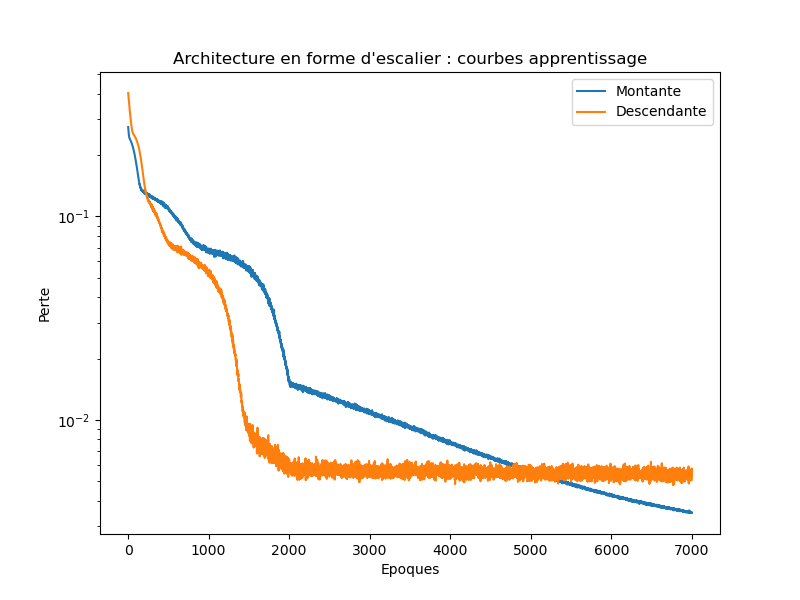

In [14]:
#####################################
# Comparaison montant et descendant #
#####################################
fig9 = plt.figure(figsize=(8,6))
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.title("Architecture en forme d'escalier : courbes apprentissage")
line1, = plt.plot(Courbe_3G.iloc[:,0],Courbe_3G.iloc[:,1:2].values)
line2, = plt.plot(Courbe_3D.iloc[:,0],Courbe_3D.iloc[:,1:2].values)
plt.legend([line1, line2],['Montante','Descendante'])
plt.yscale('log')
plt.show()

## Etape 4 - Architecture pyramidale

In [15]:
##########################################################
# Lecture des fichiers contenant les données des courbes #
##########################################################
Courbe_1P = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Pyramidale\Pyramide_3.csv')
Courbe_1P.columns = ['Epoques','Perte']
Courbe_2P = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Pyramidale\Pyramide_5.csv')
Courbe_2P.columns = ['Epoques','Perte']
Courbe_3P = pd.read_csv(r'C:\Users\tangu\Projet\Architecture_Reseau\Choc\Pyramidale\Pyramide_7.csv')
Courbe_3P.columns = ['Epoques','Perte']

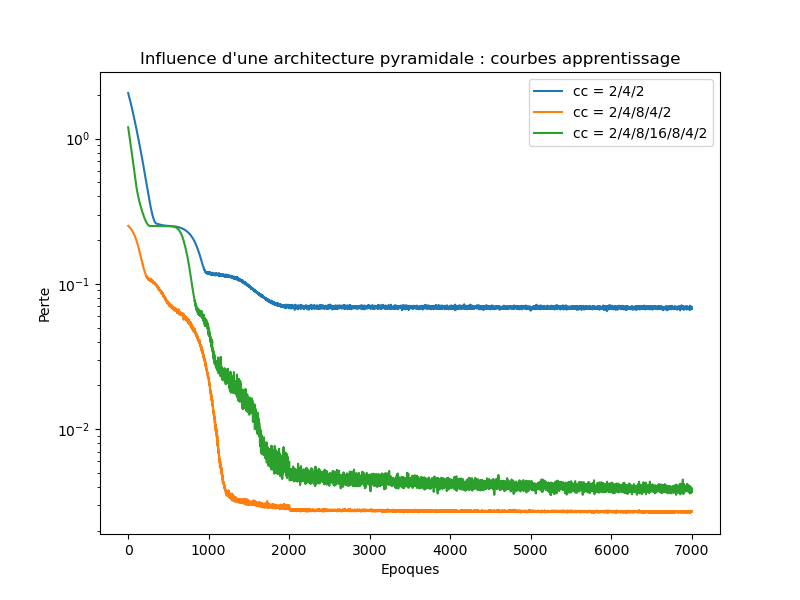

In [16]:
###################################################
# Architecture = [2/4/2,2/4/8/4/2,2/4/8/16/8/4/2] #
###################################################
fig10 = plt.figure(figsize=(8,6))
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.title("Influence d'une architecture pyramidale : courbes apprentissage")
line1, = plt.plot(Courbe_1P.iloc[:,0],Courbe_1P.iloc[:,1:2].values)
line2, = plt.plot(Courbe_1P.iloc[:,0],Courbe_2P.iloc[:,1:2].values)
line3, = plt.plot(Courbe_1P.iloc[:,0],Courbe_3P.iloc[:,1:2].values)
plt.legend([line1, line2, line3],['cc = 2/4/2','cc = 2/4/8/4/2','cc = 2/4/8/16/8/4/2'])
plt.yscale('log')
plt.show()

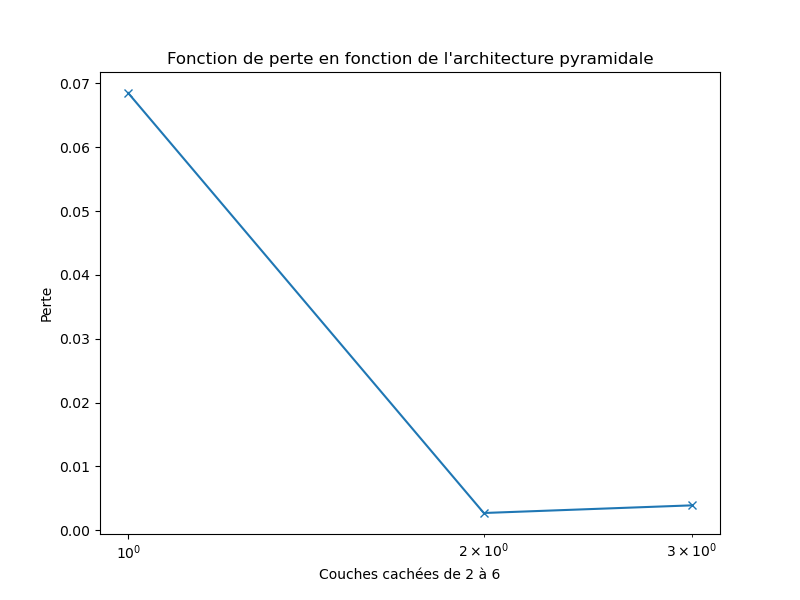

In [17]:
###################################################
# Fonction de perte en fonction de l'architecture #
###################################################
# Liste des learning rate
Architecture=[1,2,3]
# On fait une moyenne de la fonction de perte sur les 1000 dernières itérations
Perte_1 = sum(Courbe_1P.iloc[6000:7000,1:2].values)/1000
Perte_2 = sum(Courbe_2P.iloc[6000:7000,1:2].values)/1000
Perte_3 = sum(Courbe_3P.iloc[6000:7000,1:2].values)/1000
# Liste des valeurs de la fonction de perte
Perte = [Perte_1,Perte_2,Perte_3]
# On trace la figure
fig11 = plt.figure(figsize=(8,6))
plt.xlabel("Couches cachées de 2 à 6")
plt.ylabel("Perte")
plt.title("Fonction de perte en fonction de l'architecture pyramidale")
line1, = plt.plot(Architecture,Perte,'-x')
plt.xscale('log')
plt.show()

## Etape 5 - Comparaison des meilleurs modèles

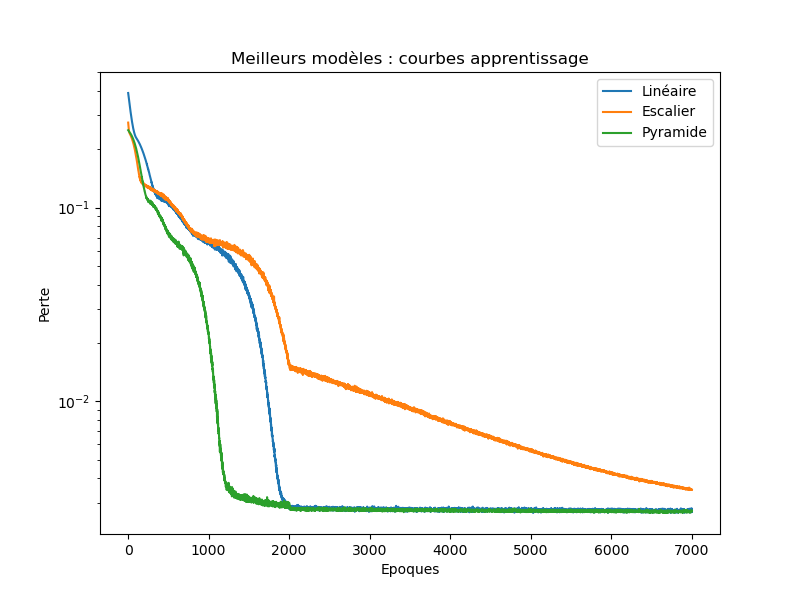

In [18]:
##########################################
# Meilleurs modèles courbe apprentissage #
##########################################
fig12 = plt.figure(figsize=(8,6))
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.title("Meilleurs modèles : courbes apprentissage")
line1, = plt.plot(Courbe_3.iloc[:,0],Courbe_3.iloc[:,1:2].values)
line2, = plt.plot(Courbe_3G.iloc[:,0],Courbe_3G.iloc[:,1:2].values)
line3, = plt.plot(Courbe_2P.iloc[:,0],Courbe_2P.iloc[:,1:2].values)
plt.legend([line1, line2, line3],['Linéaire','Escalier','Pyramide'])
plt.yscale('log')
plt.show()